In [5]:
import numpy as np
import pandas as pd
#lire le fichier 'titanic-passengers.csv'
df = pd.read_csv("titanic-passengers.csv", sep =';')

In [6]:
#affichons les cinqs premiers valeurs
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
#affichons l'entete de l'ensemble des données représentée par les colonnes
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
#affichons les informations fgénérales sur les colonnes et les valeurs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
#verifions les données manquantes et avec isnull()
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [10]:
#regardons ensuite la somme des valeurs nulles pour chaque colonne
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#remplaçons les valeurs manquantes de la colonne 'Age' par la mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
#remplaçons les valeurs manquantes de la colonne 'Cabin' par la mode
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
#remplaçons les valeurs manquantes de la colonne 'Embarked' par la mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
#verifions maintenant s'il y'a des valeurs manquantes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'Histogramme des différents ages'}, xlabel='Age', ylabel='Frequency'>

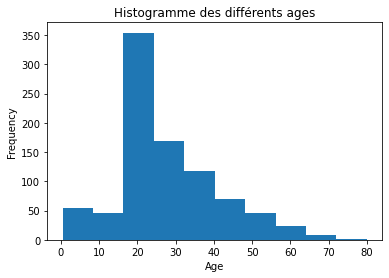

In [13]:
#etudions la distribution des caractéristique de varaible 'Age'
import matplotlib.pyplot as plt
plt.title('Histogramme des différents ages')
plt.xlabel('Age')
df['Age'].plot.hist()

<AxesSubplot:title={'center':'Histogramme des différents tarifs'}, xlabel='Tarif', ylabel='Frequency'>

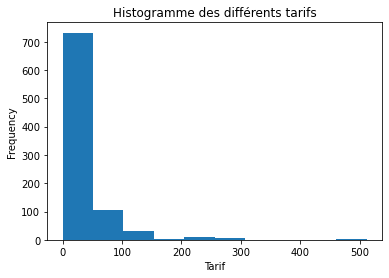

In [14]:
#etudions la distribution des caractéristique de varaible 'Fare'
import matplotlib.pyplot as plt
plt.title('Histogramme des différents tarifs')
plt.xlabel('Tarif')
df['Fare'].plot.hist()

<AxesSubplot:title={'center':'Histogramme des différents SibSp'}, xlabel='SibSp', ylabel='Frequency'>

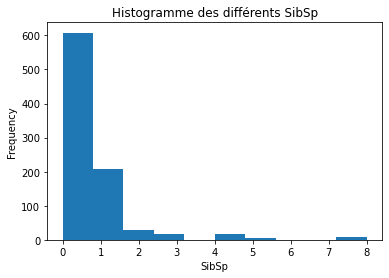

In [15]:
#etudions la distribution des caractéristique de varaible 'SibSp'
import matplotlib.pyplot as plt
plt.title('Histogramme des différents SibSp')
plt.xlabel('SibSp')
df['SibSp'].plot.hist()

<AxesSubplot:title={'center':'Histogramme des différents Parch'}, xlabel='Parch', ylabel='Frequency'>

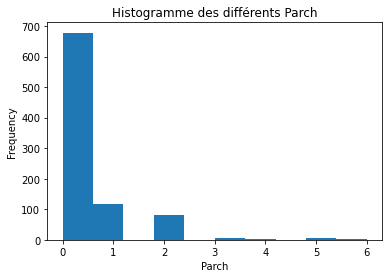

In [16]:
#etudions la distribution des caractéristique de varaible 'Parch'
import matplotlib.pyplot as plt
plt.title('Histogramme des différents Parch')
plt.xlabel('Parch')
df['Parch'].plot.hist()

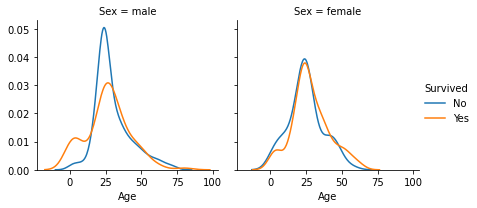

In [17]:
#visualisons la corrélation entre l'age et le sexe et étudions leur impact sur la survie des individus
import seaborn as sns
figure = sns.FacetGrid(df, col="Sex", hue="Survived")
figure.map(sns.kdeplot, 'Age').add_legend()

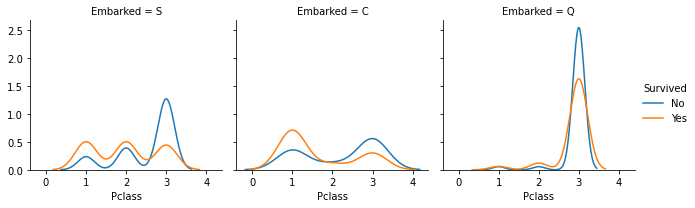

In [18]:
#choisissons deux autres caractéristiques et étudions leur impact sur la surivie des individus
#nous portons notre choix sur les variables 'Pclass' et 'Embarked'
import seaborn as sns
figure = sns.FacetGrid(df, col="Embarked", hue="Survived")
figure.map(sns.kdeplot, 'Pclass').add_legend()

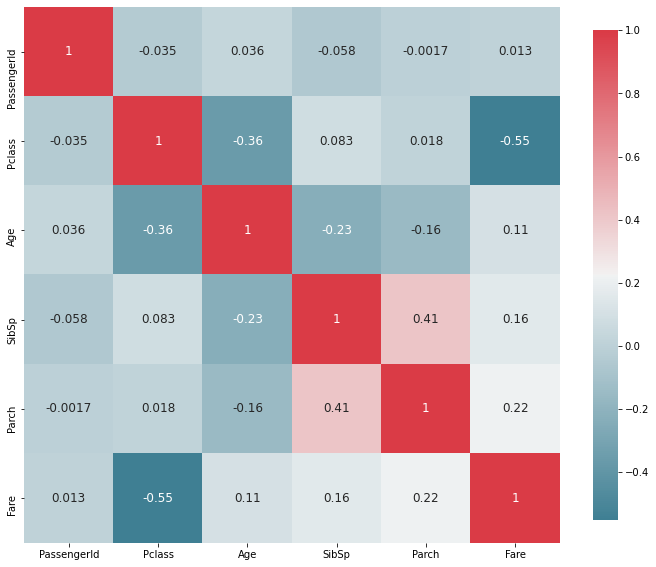

In [19]:
#analysons les résultats de cette focntion
import matplotlib.pyplot as plt
import seaborn as sn
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)

In [20]:
# to nanalyse
"""Here we have a table containing correlation coefficients, which vary from -0.4 to 1, between the different variables\
 which tend to increase or decrease.\
 a positive value reflects that the correlation is positive, a negative value reflects that the correlation is negative and a\
 value close to zero reflects the lack of correlation.\
 We also note that the different grid of the map are colored"""

'Here we have a table containing correlation coefficients, which vary from -0.4 to 1, between the different variables which tend to increase or decrease. a positive value reflects that the correlation is positive, a negative value reflects that the correlation is negative and a value close to zero reflects the lack of correlation. We also note that the different grid of the map are colored'

In [21]:
#utilisons a fonction gropuby() combiné avec la moyenne pour afficher la relation entre 'Pclass' et 'Survived'
df[["Survived", "Pclass"]].groupby(['Survived']).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [22]:
#supprimons les colonnes unitiles 
#copions d'abord le dataframe pour pouvoir aprés récupérer les valeurs de la colonne 'Name'
new_df = df.copy()
#supprimons la colonne nom
df.drop(columns=["Name"], inplace=True)
#supprimons la colonne cabin
df.drop(columns=["Cabin"], inplace=True)
#supprimons la colonne Ticket
df.drop(columns=["Ticket"], inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,343,No,2,male,28.0,0,0,13.0000,S
1,76,No,3,male,25.0,0,0,7.6500,S
2,641,No,3,male,20.0,0,0,7.8542,S
3,568,No,3,female,29.0,0,4,21.0750,S
4,672,No,1,male,31.0,1,0,52.0000,S


In [24]:
#créons le colonne 'Title' qui contient des valeurs extraites à partir de la colonne 'Name'
def extraction(x):
    #on découpe la chaine en deux parite, avec comme séparateur ', '
    #on récupére la deuxième partie qu'on elle couper en deux paries, avec comme séparateur '.'
    return x.split(', ')[1].split('.')[0]
df['Title'] = new_df['Name'].apply(extraction) #on applique notre fonction aux valeurs de notre colonne titre

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,343,No,2,male,28.0,0,0,13.0000,S,Mr
1,76,No,3,male,25.0,0,0,7.6500,S,Mr
2,641,No,3,male,20.0,0,0,7.8542,S,Mr
3,568,No,3,female,29.0,0,4,21.0750,S,Mrs
4,672,No,1,male,31.0,1,0,52.0000,S,Mr


In [26]:
#voyons les valeurs de la colonne 'Title'
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Don               1
Capt              1
Ms                1
Mme               1
Name: Title, dtype: int64

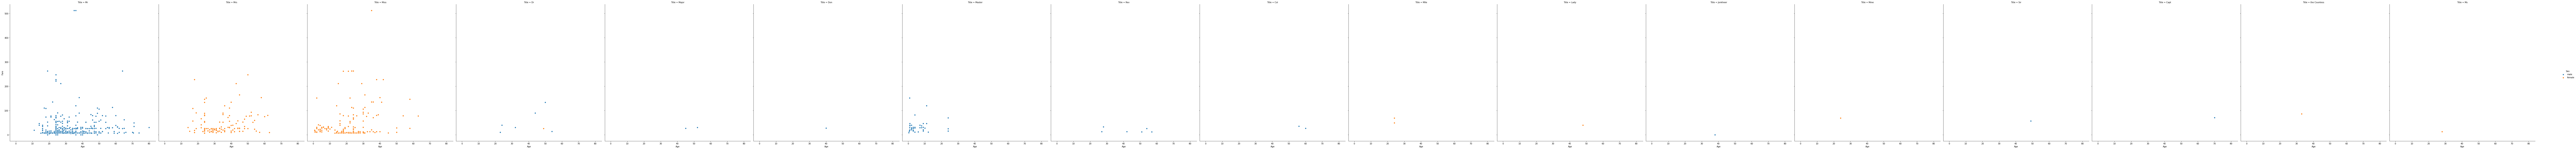

In [27]:
#étudions la corrélation entre la colonne 'Title' et l'autres colonne
import seaborn as sns
import matplotlib.pyplot as plt
figure = sns.FacetGrid(df, col="Title", hue="Sex", height=10)
figure.map(sns.scatterplot, 'Age', 'Fare').add_legend()

In [28]:
#essayons de regrouper ceratains titre à l'aide du dictionnaire suivant
Title_Dictionary = {
    "Title": {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }
}
df.replace(Title_Dictionary, inplace=True)

In [29]:
#les nouvelles valeurs de colonne compte
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

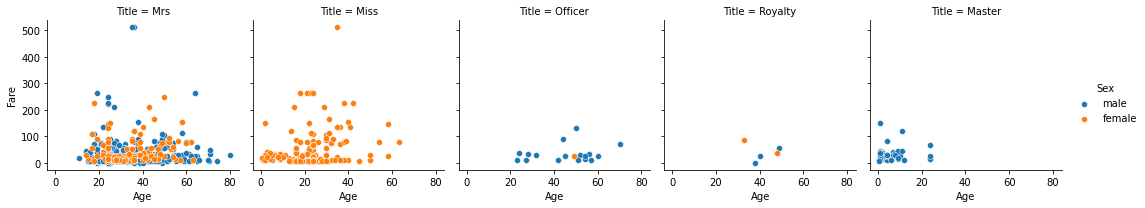

In [30]:
#visualisons maintenant les corrélations entre 'Title', 'Fare', 'Age'
import seaborn as sns
import matplotlib.pyplot as plt
figure = sns.FacetGrid(df, col="Title", hue="Sex")
figure.map(sns.scatterplot, 'Age', 'Fare').add_legend()

In [32]:
#utilisons les colonnes SibSp et Parch pour creer une fonctionnalité
df['FamilySize'] = df['SibSp'] + df ['Parch']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,343,No,2,male,28.0,0,0,13.0000,S,Mrs,0
1,76,No,3,male,25.0,0,0,7.6500,S,Mrs,0
2,641,No,3,male,20.0,0,0,7.8542,S,Mrs,0
3,568,No,3,female,29.0,0,4,21.0750,S,Mrs,4
4,672,No,1,male,31.0,1,0,52.0000,S,Mrs,1


<AxesSubplot:title={'center':'Histogramme des différents FamilySize'}, xlabel='FamilySize', ylabel='Frequency'>

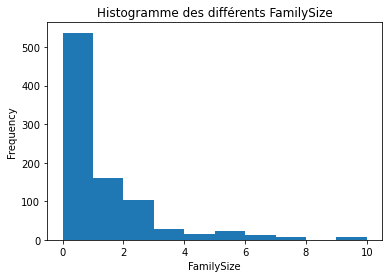

In [35]:
import matplotlib.pyplot as plt
plt.title('Histogramme des différents FamilySize')
plt.xlabel('FamilySize')
df['FamilySize'].plot.hist()

In [36]:
#conclusion avec cette fonctionnalité
"""cette fonctionnalité est utile, elle nous donne une lecture sur plus claire surr la corrélation de nos variables"""

'cette fonctionnalité est utile, elle nous donne une lecture sur plus claire surr la corrélation de nos variables'